In [1]:
import os
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
from datetime import datetime
import requests
import json
import ecoscope
ecoscope.init(selenium=True, silent=True)
import shapely
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go

TypeError: descriptor '__call__' for 'type' objects doesn't apply to a 'property' object

In [18]:
class smart_session():
    def __init__(self,urlBase:str, username:str, password:str):
        print(urlBase)
        self._urlBase = urlBase
        self._username = username
        self._password = password
        
    def login(self):
        login_data = {
            "username" : self._username,
            "password" : self._password,
        }
        print(self._urlBase)
        response = requests.post(f"{self._urlBase}token", data=login_data)
        print(response)
        if response.status_code == 200:
            self._token = response.json()["access_token"]
            return self._token
        else:
            #token = None
            raise Exception("failed to login")

    def query_data(self, url, params):
        #if not token:
        #    token = login (username='smartuser', password='smart1234')
            
        headers = {"Authorization": f"Bearer {self._token}", }
    
        session = requests.Session()
        r = session.get(f'{self._urlBase}{url}', verify=False, params=params, headers=headers) 
        
        if r.status_code == 200:
            #print(r.json())
            df = pd.DataFrame(r.json())
            # df.to_file("observations-v2.geojson", driver="GeoJSON")
            # df.to_file("observations-v2.gpkg", driver="GPKG")
            
        else:
            print (r.status_code)
            df = None
        
        return df

    def query_geojson_data(self, url, params):
        #if not token:
        #    token = login (username='smartuser', password='smart1234')
            
        headers = {"Authorization": f"Bearer {self._token}", }
    
        session = requests.Session()
        r = session.get(f'{self._urlBase}{url}', verify=False, params=params, headers=headers) 
        
        if r.status_code == 200:
            df = gpd.GeoDataFrame.from_features(r.json(), crs=4326)
            # df.to_file("observations-v2.geojson", driver="GeoJSON")
            # df.to_file("observations-v2.gpkg", driver="GPKG")
            
        else:
            print (r.status_code)
            df = None
        
        return df

In [19]:
username='smartuser'
password='smart1234'
#token = None
urlBase = 'http://localhost:8000/'

session = smart_session(urlBase, username, password)

token = session.login ()

http://localhost:8000/
http://localhost:8000/
<Response [200]>


In [119]:
params = {}
params["ca_uuid"] = "a2516167-3da8-440e-b56b-6f68c2f11d53"
params["language_uuid"] = "2af26704-7dd9-4a77-bbd4-c1953800d4f8"
params["start_date"] = "2024-02-20T00:00:00"
params["end_date"] = "2024-03-20T00:00:00"

params["employee_uuid"] = ['08ab9cda-4561-4ae8-bf24-fc0e37ebfb64','3ac2bbc0-fcc6-4969-bf32-e8ddab20a586', '00000000-0000-0000-0000-000000000000']
#params["employee_uuid"] = ['08ab9cda-4561-4ae8-bf24-fc0e37ebfb64','3ac2bbc0-fcc6-4969-bf32-e8ddab20a586']
params["transport_uuid"] = '76cb89cd-f53b-4884-a697-21fe1a66c7df'
#params["limit"] = 5
#params["speed_and_bearing"] = False
#print(params)
df = session.query_data(url='efforts', params=params)
employees = session.query_data(url='employee/', params={'ca_uuid':"a2516167-3da8-440e-b56b-6f68c2f11d53"})
#print(employees.head())
df = df.merge(employees, left_on='employee_uuid', right_on='uuid')
#box = shapely.box(xmin=13,ymin=-22,xmax=18,ymax=-17)
#df = df.clip(mask=box)
df = df.nlargest(20, ['Patrol Count', 'distance'])
#df

Patrol Count  Patrol Leg Count  Patrol Leg Day Count  distance  \
26            33                33                    33  221.6710   
1             31                32                    32  381.6180   
15            30                31                    31  307.4370   
7             23                23                    23  157.1630   
21            22                23                    23  254.4370   
47            20                20                    20  283.5260   
43            20                20                    20  259.0900   
10            20                20                    20  241.2960   
44            20                20                    20  149.9900   
20            18                19                    19  243.7810   
0             16                16                    16  120.6380   
42            16                18                    18  111.4870   
46            14                14                    14   98.2563   
27            13                14                    14  125.2490   
38            13                13                    13  113.3710   
25            13                15                    15   94.1260   
19            12                12                    12  224.5340   
37            12                12                    12  144.1870   
11            12                12                    13  144.1640   
6             12                12                    12  132.3580   

   First Patrol Start Time  Last Patrol End Time   duration(s)  duration(h)  \
26      2024-02-22T08:30:18   2024-03-14T14:44:32     275012.0    76.392221   
1       2024-02-20T09:25:30   2024-03-19T18:26:29     730028.0   202.785556   
15      2024-02-20T15:32:33   2024-03-19T14:07:11     340460.0    94.572223   
7       2024-02-22T08:30:18   2024-03-04T18:21:51     207308.0    57.585554   
21      2024-02-20T06:34:11   2024-03-11T12:24:12     304413.0    84.559168   
47      2024-02-23T08:24:13   2024-03-20T10:46:36     290031.0    80.564167   
43      2024-02-20T10:07:07   2024-03-20T12:07:58     247358.0    68.710554   
10      2024-02-20T09:21:18   2024-03-20T09:27:57     240666.0    66.851667   
44      2024-02-28T08:37:41   2024-03-14T10:42:42     189823.0    52.728612   
20      2024-02-26T05:33:39   2024-03-12T10:16:54     245078.0    68.077223   
0       2024-02-20T11:22:55   2024-03-19T19:53:32     222144.0    61.706668   
42      2024-02-20T07:43:17   2024-03-19T12:23:48     232184.0    64.495555   
46      2024-02-20T07:10:46   2024-03-11T13:14:22     106962.0    29.711667   
27      2024-02-21T17:12:16   2024-03-14T20:02:13     181132.0    50.314446   
38      2024-02-22T10:56:42   2024-03-08T13:39:48     113452.0    31.514445   
25      2024-02-23T16:28:49   2024-03-13T20:00:49     108750.0    30.208332   
19      2024-02-29T07:03:50   2024-03-10T19:54:59     204903.0    56.917499   
37      2024-02-29T06:35:09   2024-03-11T12:24:12     182134.0    50.592779   
11      2024-02-27T16:49:07   2024-03-09T19:32:00     247430.0    68.730556   
6       2024-02-22T06:37:23   2024-03-12T13:18:06     138613.0    38.503610   

    average distance                         employee_uuid  \
26          6.717293  731dd785-0625-4dc1-9d60-144cd6cec554   
1          11.925557  0845746e-9ccb-4208-9b3c-fb16cc0ee991   
15          9.917312  44f58aa3-3012-4c2b-aa4e-8903166a5a12   
7           6.833160  2ae644c4-60e8-4908-aaec-d9aa7666e102   
21         11.062474  59cb0f69-ade0-4c2b-95f6-a931e943d264   
47         14.176282  f3df8e13-a171-4219-b1e4-deef99749119   
43         12.954486  da705a48-c0e3-4318-856c-7dba83ee7e02   
10         12.064798  310d8828-f142-41b2-83c8-a1d415ab721c   
44          7.499515  eca86cdf-e926-44f5-952d-319a716aa143   
20         12.830602  57ee57cf-59cc-4a3c-9d6f-177077f0e0cd   
0           7.539905  03cd921d-6a94-4e32-8ca2-8cf0ef7c0cee   
42          6.193744  cd6e38f8-a59b-47b0-bb2c-5d15d10f50c3   
46          7.018305  efac76b4-6b16-497e-9d6c-02e9241419de   
27   

10


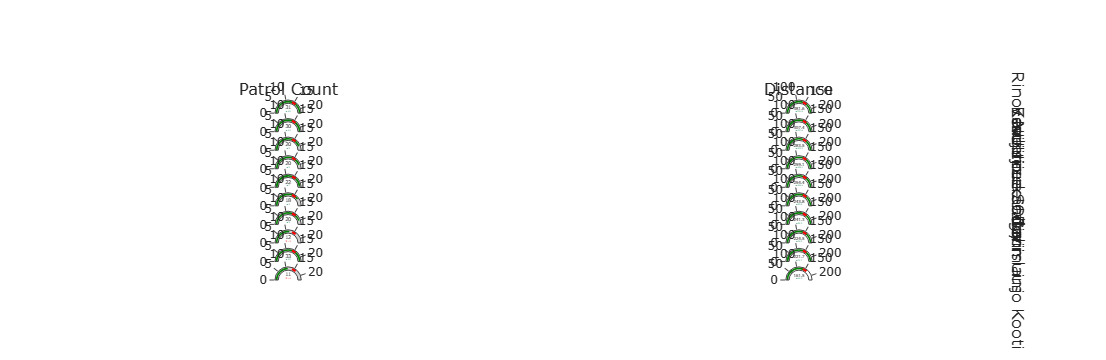

In [115]:
#fig = pl.subplots.make_subplots(rows = 1, cols= len(df),
#                                specs=[[{'type': 'indicator'}, {'type': 'indicator'}]])
fig = pl.subplots.make_subplots(rows = len(df), cols= 2,
                                specs=[[{'type': 'indicator'}, {'type': 'indicator'}] for _ in range(len(df))],
                                 column_titles = ['Patrol Count', 'Distance'],     
                                 row_titles = [ x.givenname for x in df.iloc() ],
                                #print_grid = True
                                #row_heights = [100 for _ in range(len(df))]
                                #vertical_spacing = 1
                                #x=1
                               )
ranger = 1

monthly_patrol_count = 15
monthly_distance = 10 * monthly_patrol_count

print(len(df))
for row in df.iloc():
    #print(row)
    
    trace = go.Indicator(
        domain = {'x': [0, 1], 'y': [0, 1]},
        value = row['Patrol Count'],
        mode = "gauge+number+delta",
        #title = {'text': f'Number of Patrols {row.employee_uuid}'},
        #title = {'text': f'{row.givenname} {row.familyname} '},
        delta = {'reference': monthly_patrol_count},
        gauge = {'axis': {'range': [None, monthly_patrol_count * 1.5]},
                 'steps' : [
                     {'range': [0, 50], 'color': "lightgray"},
                     {'range': [50, 70], 'color': "gray"}],
                 'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': monthly_patrol_count}})
    

    fig.append_trace(trace, row=ranger, col=1)


    trace = go.Indicator(
        domain = {'x': [0, 1], 'y': [0, 1]},
        value = row['distance'],
        mode = "gauge+number+delta",
        #title = {'text': f'Number of Patrols {row.employee_uuid}'},
        #title = {'text': f'{row.givenname} {row.familyname} '},
        delta = {'reference': monthly_distance},
        gauge = {'axis': {'range': [None, monthly_distance * 1.5]},
                 'steps' : [
                     {'range': [0, 50], 'color': "lightgray"},
                     {'range': [50, 70], 'color': "gray"}
                 ],
                 'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': monthly_distance}})
    

    fig.append_trace(trace, row=ranger, col=2)
    
    ranger = ranger + 1
#fig.resize(figsize=[25,25],)
fig.show(width = 50, height = 500)

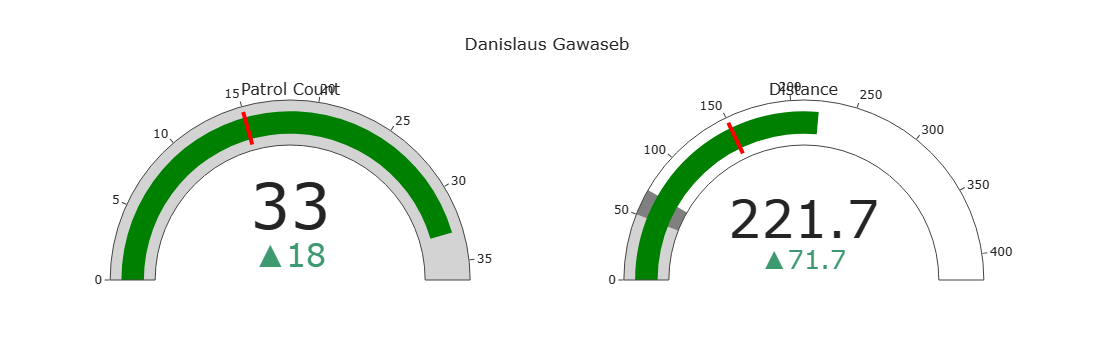

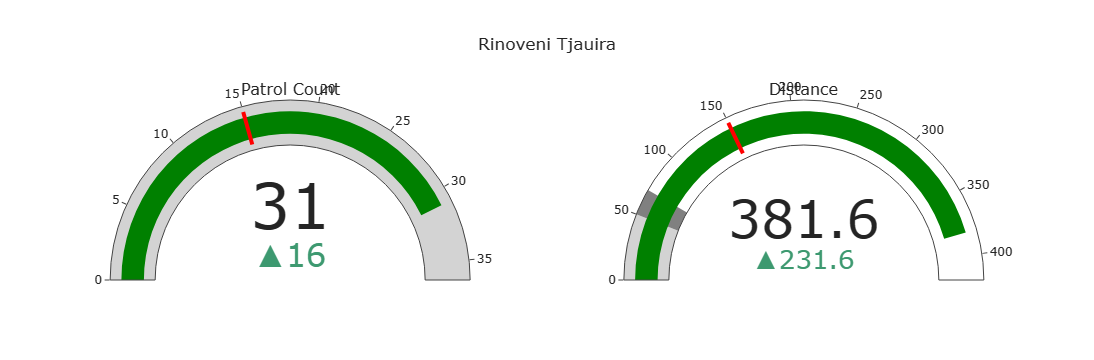

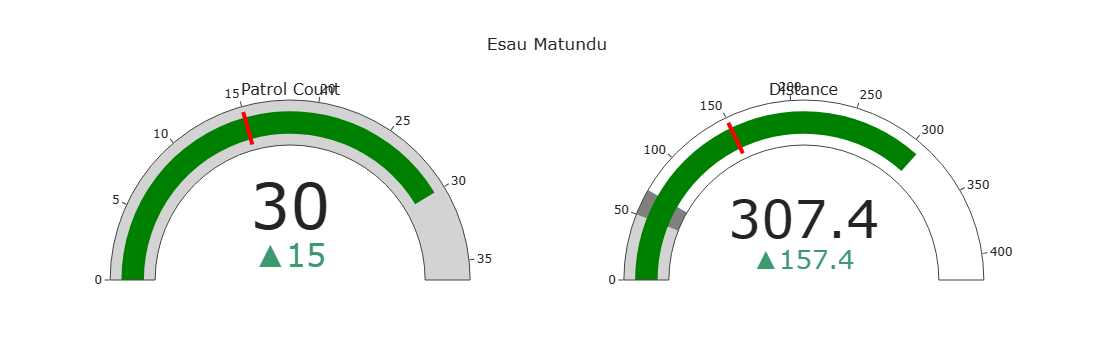

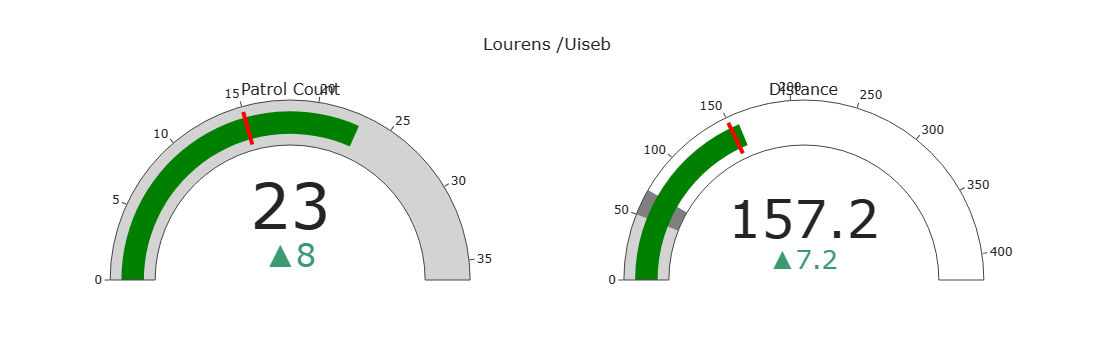

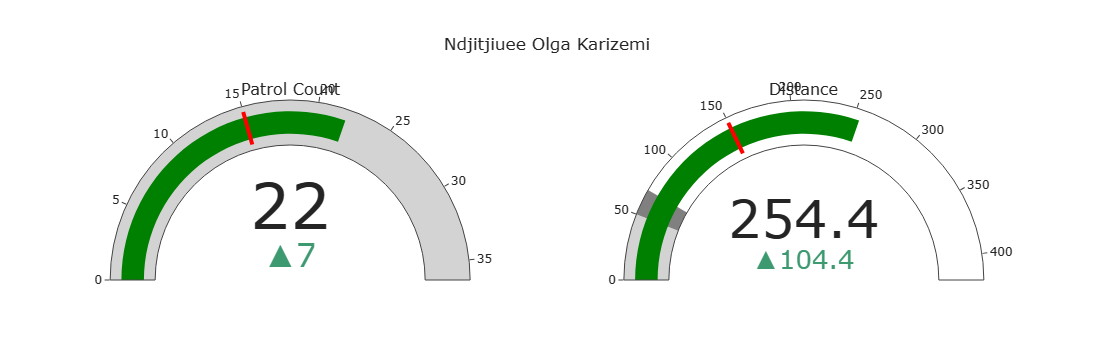

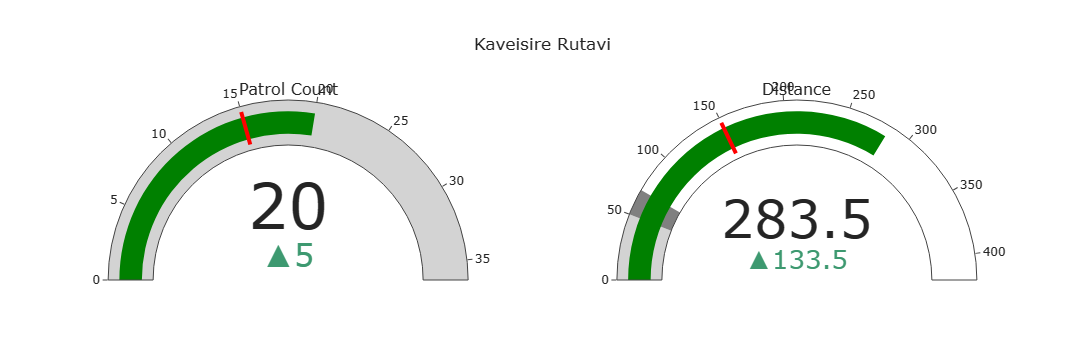

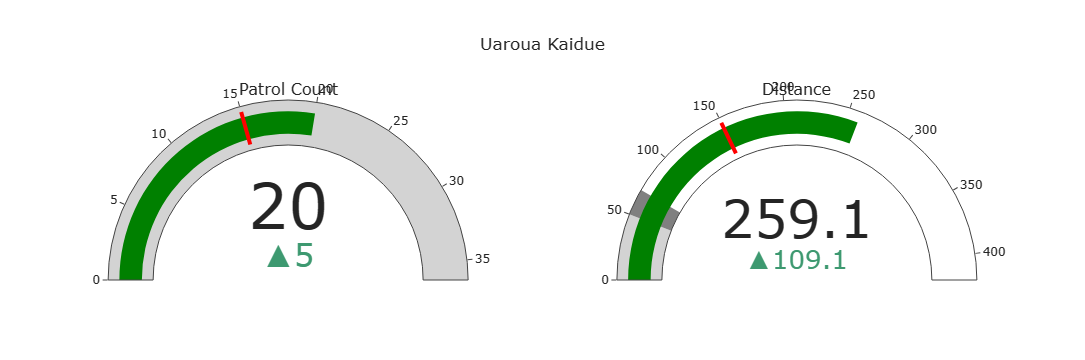

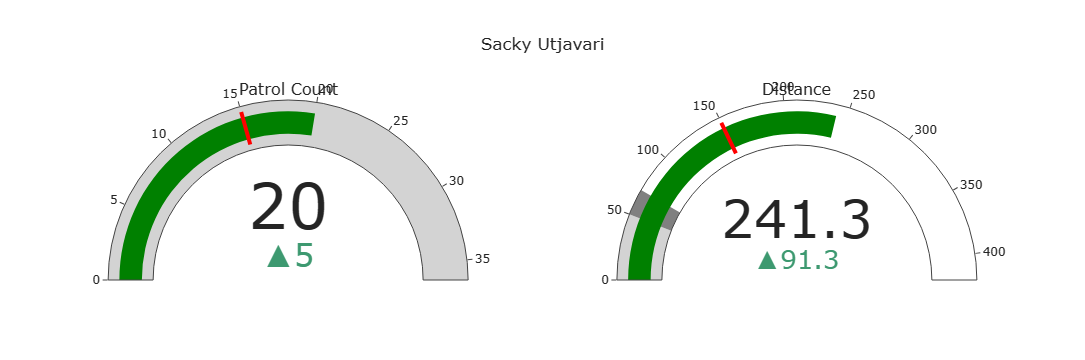

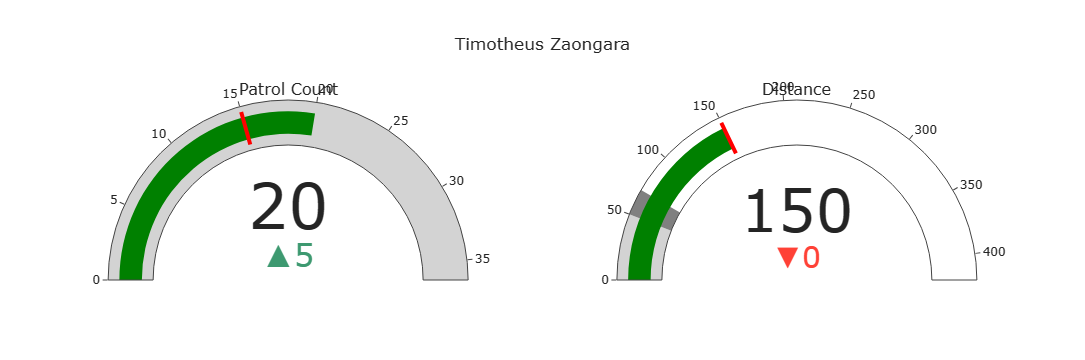

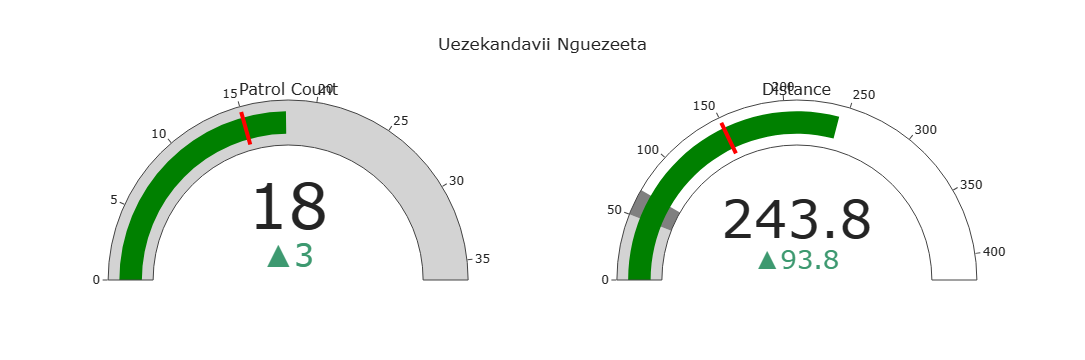

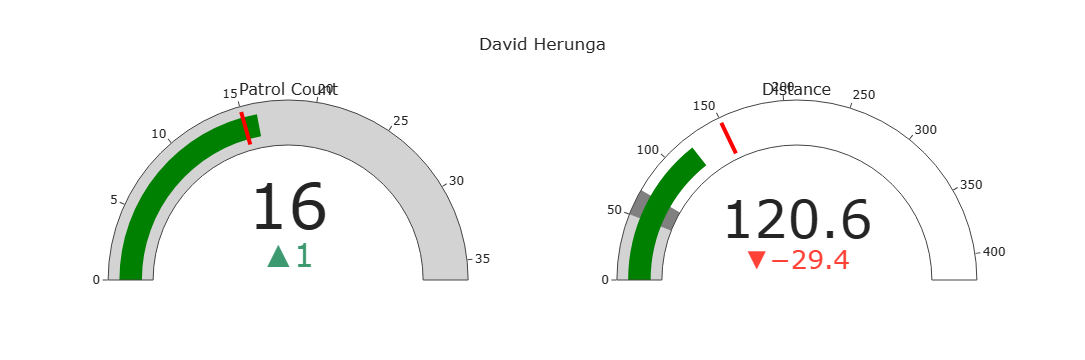

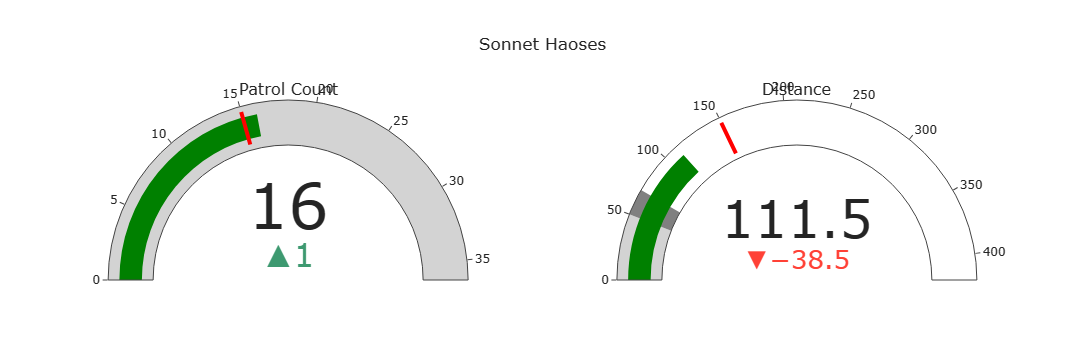

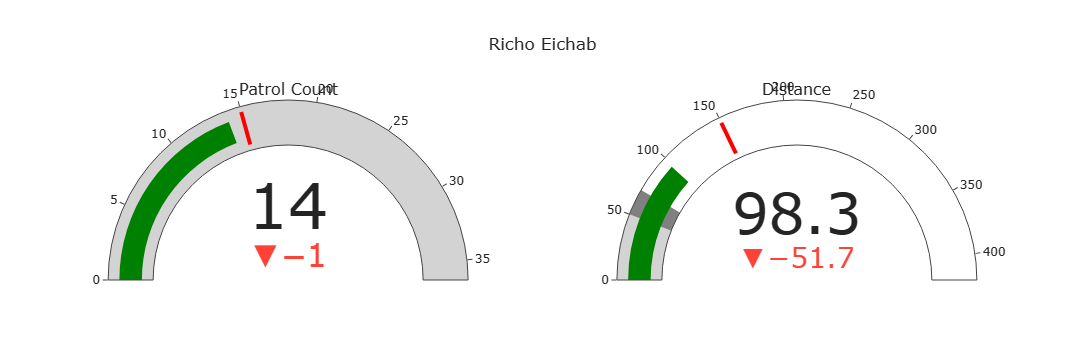

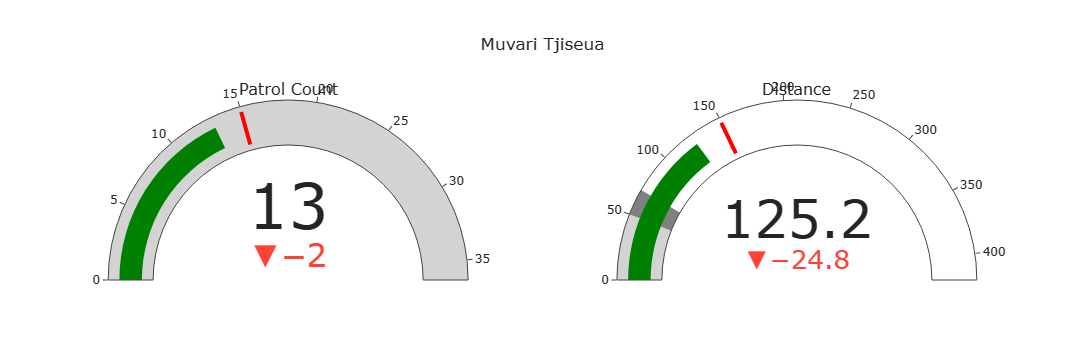

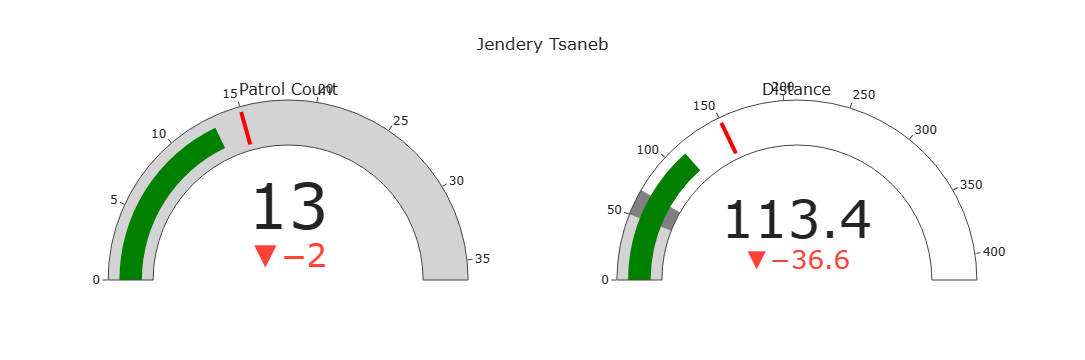

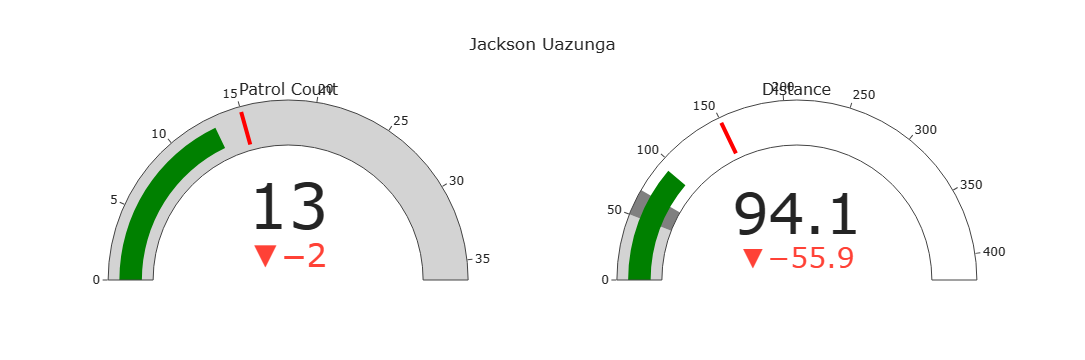

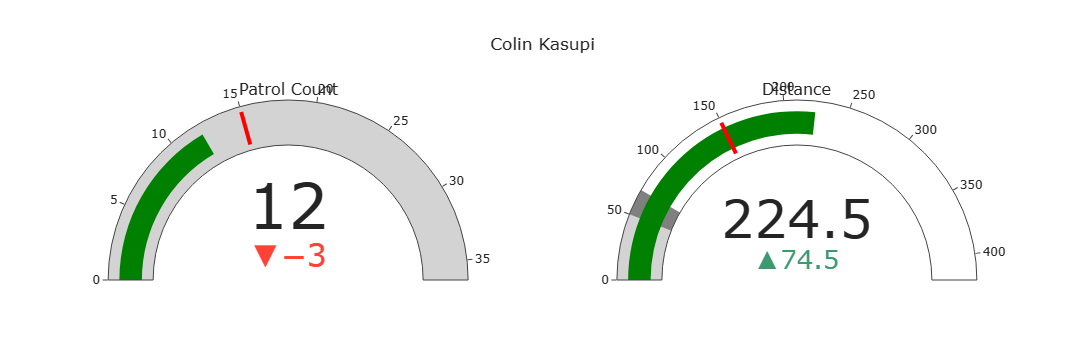

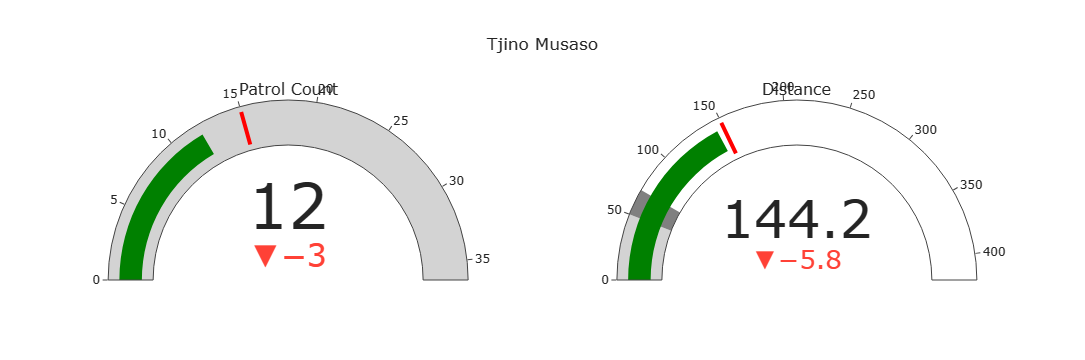

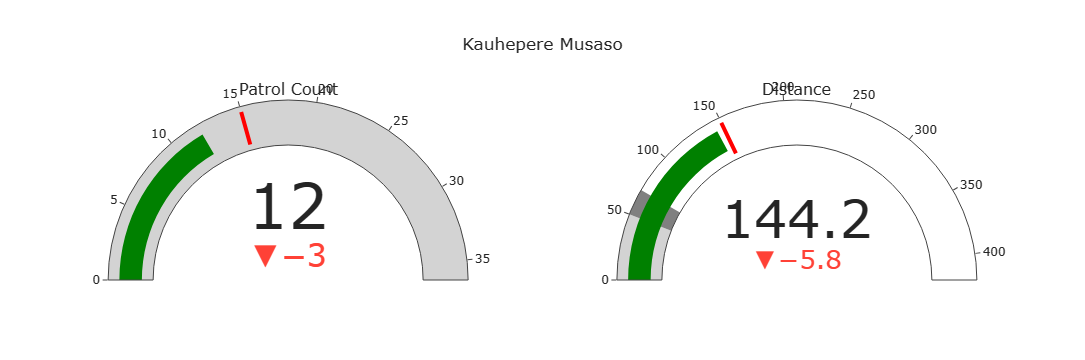

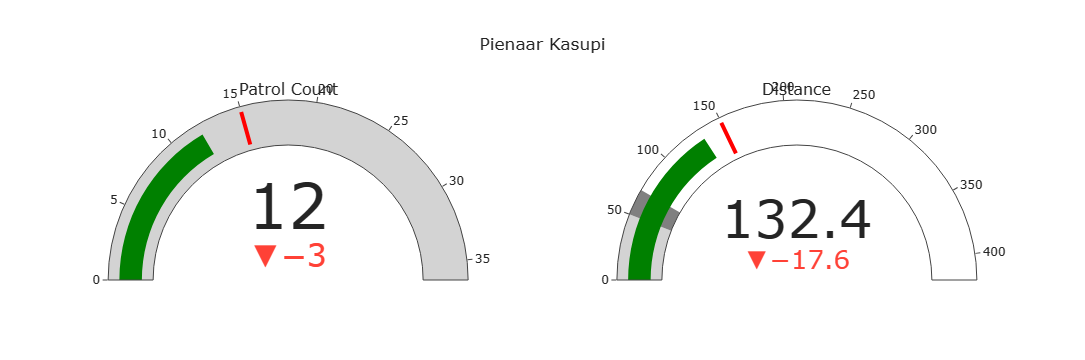

In [120]:
max_distance = df['distance'].max() * 1.1
max_patrols = df['Patrol Count'].max() * 1.1
for row in df.iloc():
    fig = pl.subplots.make_subplots(rows = 1, cols= 2,
                                specs=[[{'type': 'indicator'}, {'type': 'indicator'}]],
                                 column_titles = ['Patrol Count', 'Distance'],     
                                # row_titles = [row.givenname],
                                #print_grid = True
                                #row_heights = [100 for _ in range(len(df))]
                                #vertical_spacing = 1
                                #x=1
                               )
    
    monthly_patrol_count = 15
    monthly_distance = 10 * monthly_patrol_count

    
    trace = go.Indicator(
        domain = {'x': [0, 1], 'y': [0, 1]},
        value = row['Patrol Count'],
        mode = "gauge+number+delta",
        #title = {'text': f'Number of Patrols {row.employee_uuid}'},
        #title = {'text': f'{row.givenname} {row.familyname} '},
        delta = {'reference': monthly_patrol_count},
        gauge = {'axis': {'range': [None, max_patrols]},
                 'steps' : [
                     {'range': [0, 50], 'color': "lightgray"},
                     {'range': [50, 70], 'color': "gray"}],
                 'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': monthly_patrol_count}})
    

    fig.append_trace(trace, row=1, col=1)


    trace = go.Indicator(
        domain = {'x': [0, 1], 'y': [0, 1]},
        value = row['distance'],
        mode = "gauge+number+delta",
        #title = {'text': f'Number of Patrols {row.employee_uuid}'},
        #title = {'text': f'{row.givenname} {row.familyname} '},
        delta = {'reference': monthly_distance},
        #gauge = {'axis': {'range': [None, monthly_distance * 1.5]},
        gauge = {'axis': {'range': [None, max_distance]},
                  'steps' : [
                     {'range': [0, 50], 'color': "lightgray"},
                     {'range': [50, 70], 'color': "gray"}
                 ],
                 'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': monthly_distance}})
    

    fig.append_trace(trace, row=1, col=2)
    fig.update_layout(title=f'{row.givenname} {row.familyname}')

    fig.show(width = 50, height = 500)

<H1>Patrol Efforts over Time</h1>

In [ ]:
params = {}
params["ca_uuid"] = "a2516167-3da8-440e-b56b-6f68c2f11d53"
params["language_uuid"] = "2af26704-7dd9-4a77-bbd4-c1953800d4f8"
params["start_date"] = "2024-01-20T00:00:00"
params["end_date"] = "2024-01-20T00:00:00"

params["employee_uuid"] = ['08ab9cda-4561-4ae8-bf24-fc0e37ebfb64','3ac2bbc0-fcc6-4969-bf32-e8ddab20a586', '00000000-0000-0000-0000-000000000000']
#params["employee_uuid"] = ['08ab9cda-4561-4ae8-bf24-fc0e37ebfb64','3ac2bbc0-fcc6-4969-bf32-e8ddab20a586']
params["transport_uuid"] = '76cb89cd-f53b-4884-a697-21fe1a66c7df'
#params["limit"] = 5
#params["speed_and_bearing"] = False
#print(params)
df = session.query_data(url='efforts', params=params)
employees = session.query_data(url='employee/', params={'ca_uuid':"a2516167-3da8-440e-b56b-6f68c2f11d53"})
#print(employees.head())
df = df.merge(employees, left_on='employee_uuid', right_on='uuid')
#box = shapely.box(xmin=13,ymin=-22,xmax=18,ymax=-17)
#df = df.clip(mask=box)
df = df.nlargest(20, ['Patrol Count', 'distance'])